In [13]:
import ee
import geopandas as gpd
from src.data import gedi_pipeline
from src.data.ee import lcms_import
from src.processing.regen import regen_analysis
from src.data import ee_utils
from src.data.fire_perimeters import FirePerimeters, FirePerimetersDB, Fire, match_gedi_to_raster, FireRastersDB
from src.data import fire_perimeters
from src.data import gedi_raster_matching
from src.data import raster
import rasterio as rio
import matplotlib.pyplot as plt
import pandas as pd
from src.constants import DATA_PATH, USER_PATH
from fitter import Fitter, get_common_distributions, get_distributions
import seaborn as sns
from fastai.tabular.all import save_pickle
from src.visualization.dists import plot_pdf
from src.data import gedi_pipeline
import seaborn as sns
import numpy as np

sns.set_theme()

import importlib
importlib.reload(regen_analysis)
importlib.reload(gedi_pipeline)
importlib.reload(ee_utils)
importlib.reload(gedi_raster_matching)
importlib.reload(raster)
importlib.reload(fire_perimeters)

2023-06-20 13:22:34,579 DEBUG: Logger /home/jk871/fire-regen/src/data/gedi_pipeline.py already set up. [in get_logger at /home/jk871/fire-regen/src/utils/logging_util.py:51]
2023-06-20 13:22:34,581 DEBUG: Logger /home/jk871/fire-regen/src/data/ee_utils.py already set up. [in get_logger at /home/jk871/fire-regen/src/utils/logging_util.py:51]
2023-06-20 13:22:34,582 DEBUG: Logger /home/jk871/fire-regen/src/data/gedi_raster_matching.py already set up. [in get_logger at /home/jk871/fire-regen/src/utils/logging_util.py:51]
2023-06-20 13:22:34,584 DEBUG: Logger /home/jk871/fire-regen/src/data/fire_perimeters.py already set up. [in get_logger at /home/jk871/fire-regen/src/utils/logging_util.py:51]


<module 'src.data.fire_perimeters' from '/home/jk871/fire-regen/src/data/fire_perimeters.py'>

In [14]:
gedi_recovery_2x2 = regen_analysis.process_all_fires_with_rf_control_per_burn_year(f"{DATA_PATH}/rf/burned/2x2", f"{DATA_PATH}/rf/models_log")

Process fires for year 1985.
matching shots within fire
Processing data
Run RF to predict control AGBD.
Process fires for year 1986.
matching shots within fire
Processing data
Run RF to predict control AGBD.
Process fires for year 1987.
matching shots within fire
Processing data
Run RF to predict control AGBD.
Process fires for year 1988.
matching shots within fire
Processing data
Run RF to predict control AGBD.
Process fires for year 1989.
matching shots within fire
Processing data
Run RF to predict control AGBD.
Process fires for year 1990.
matching shots within fire
Processing data
Run RF to predict control AGBD.
Process fires for year 1991.
matching shots within fire
Processing data
Run RF to predict control AGBD.
Process fires for year 1992.
matching shots within fire
Processing data
Run RF to predict control AGBD.
Process fires for year 1993.
matching shots within fire
Processing data
Run RF to predict control AGBD.
Process fires for year 1994.
matching shots within fire
Processi

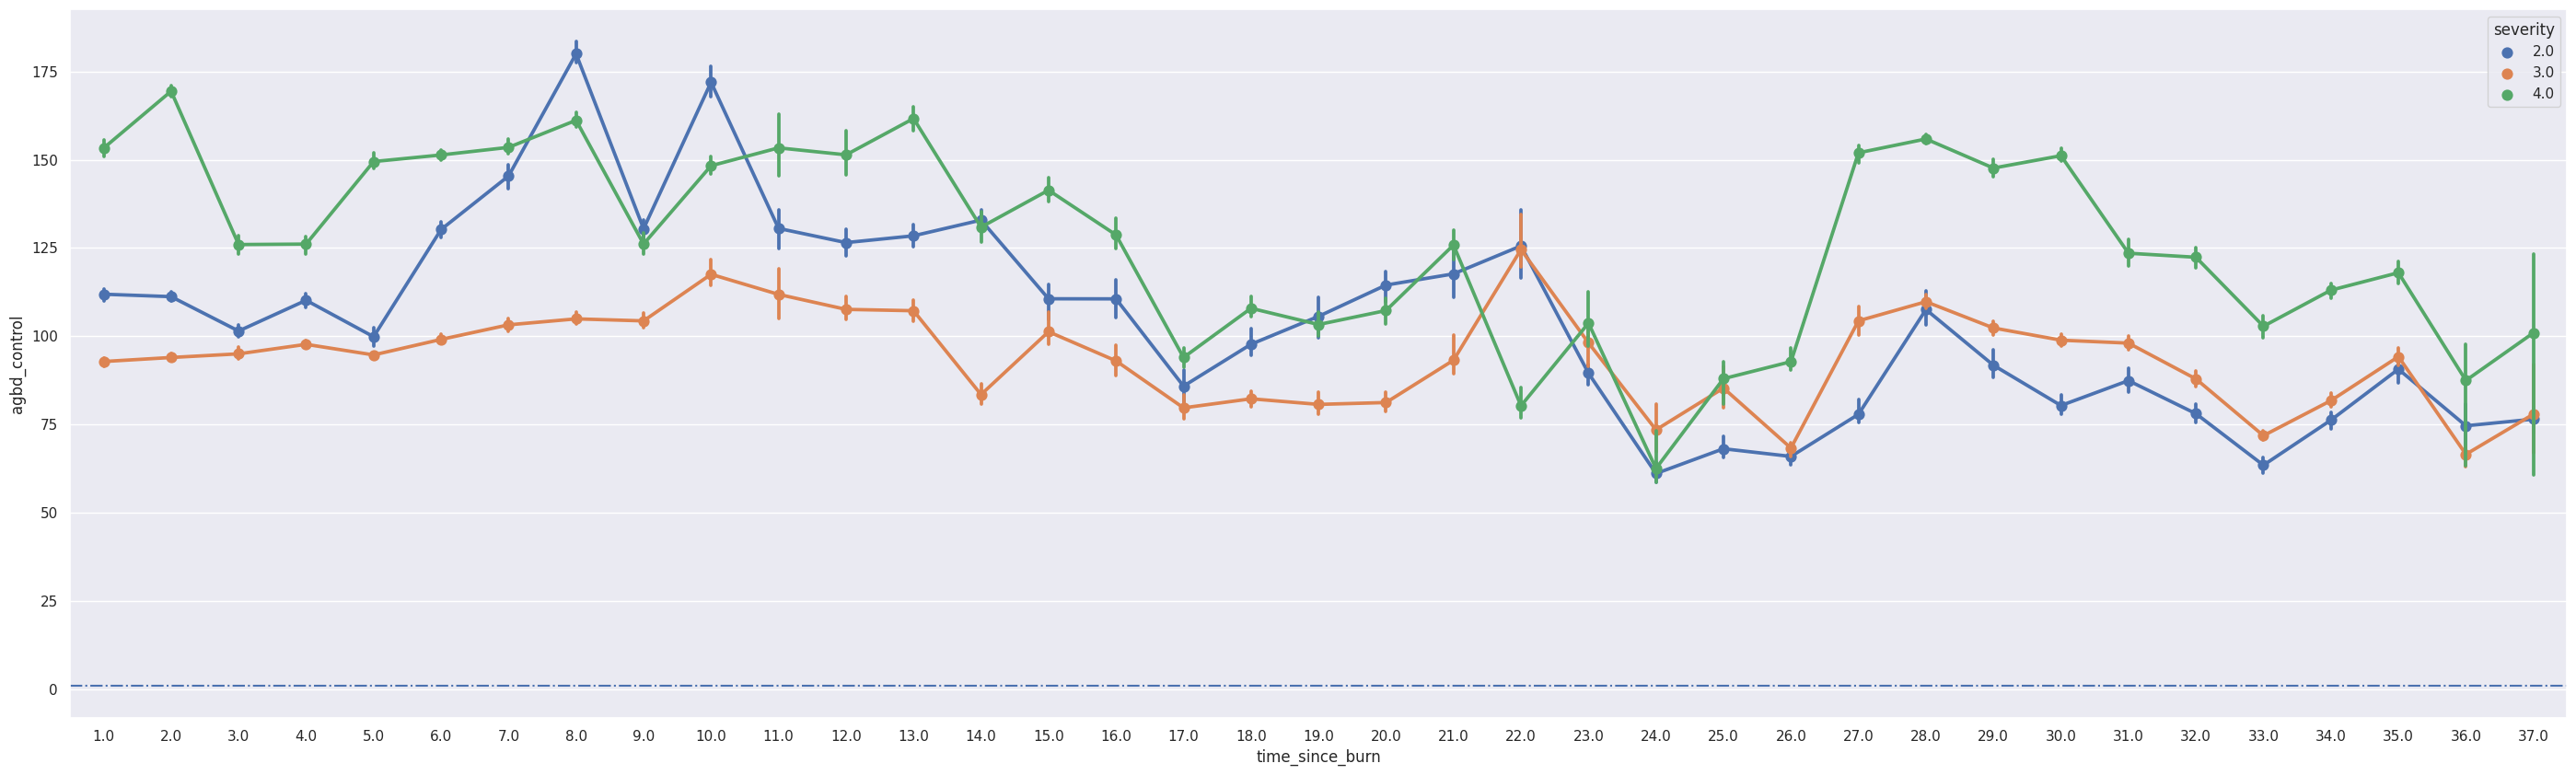

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(35, 10))
sns.pointplot(gedi_recovery_2x2[gedi_recovery_2x2.pft_class == 1], x='time_since_burn', y='agbd_control', hue='severity', estimator="median")
ax.axhline(y=1, linestyle="-.")

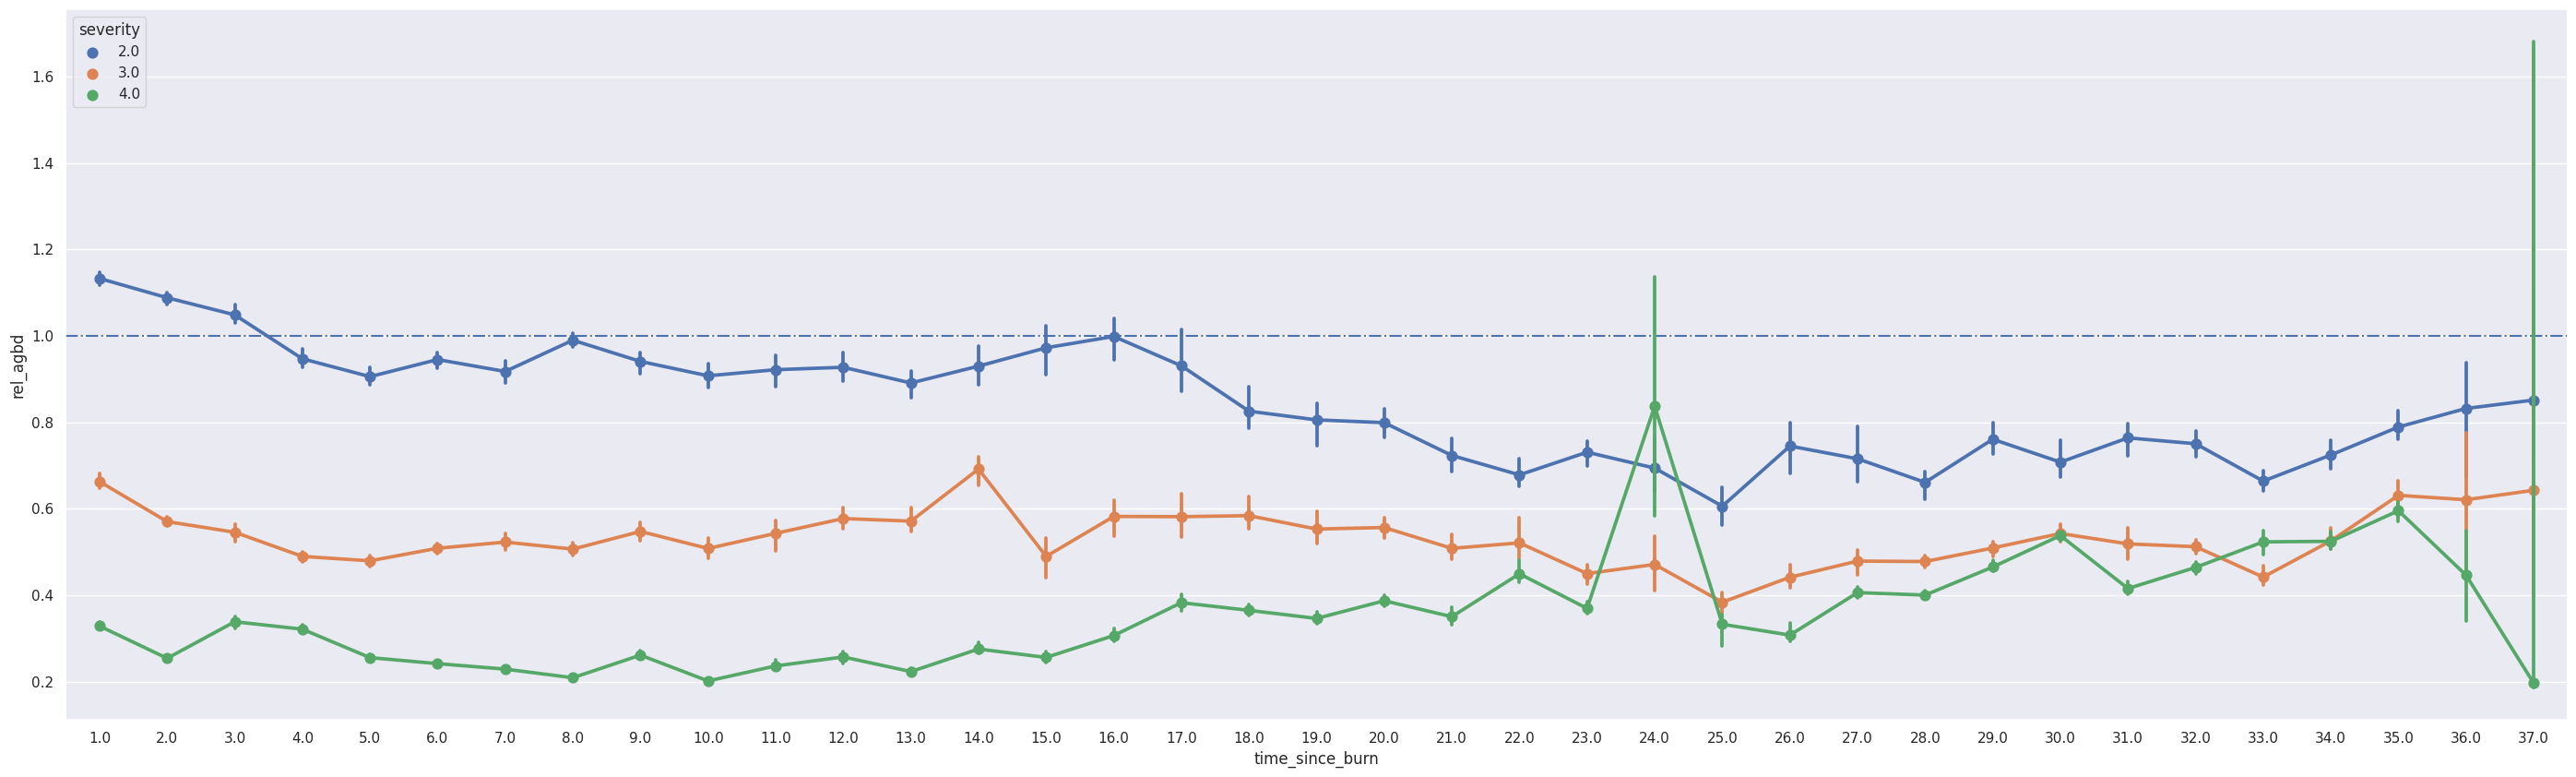

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(35, 10))
sns.pointplot(gedi_recovery_2x2[gedi_recovery_2x2.pft_class == 1], x='time_since_burn', y='rel_agbd', hue='severity', estimator="median")
ax.axhline(y=1, linestyle="-.")

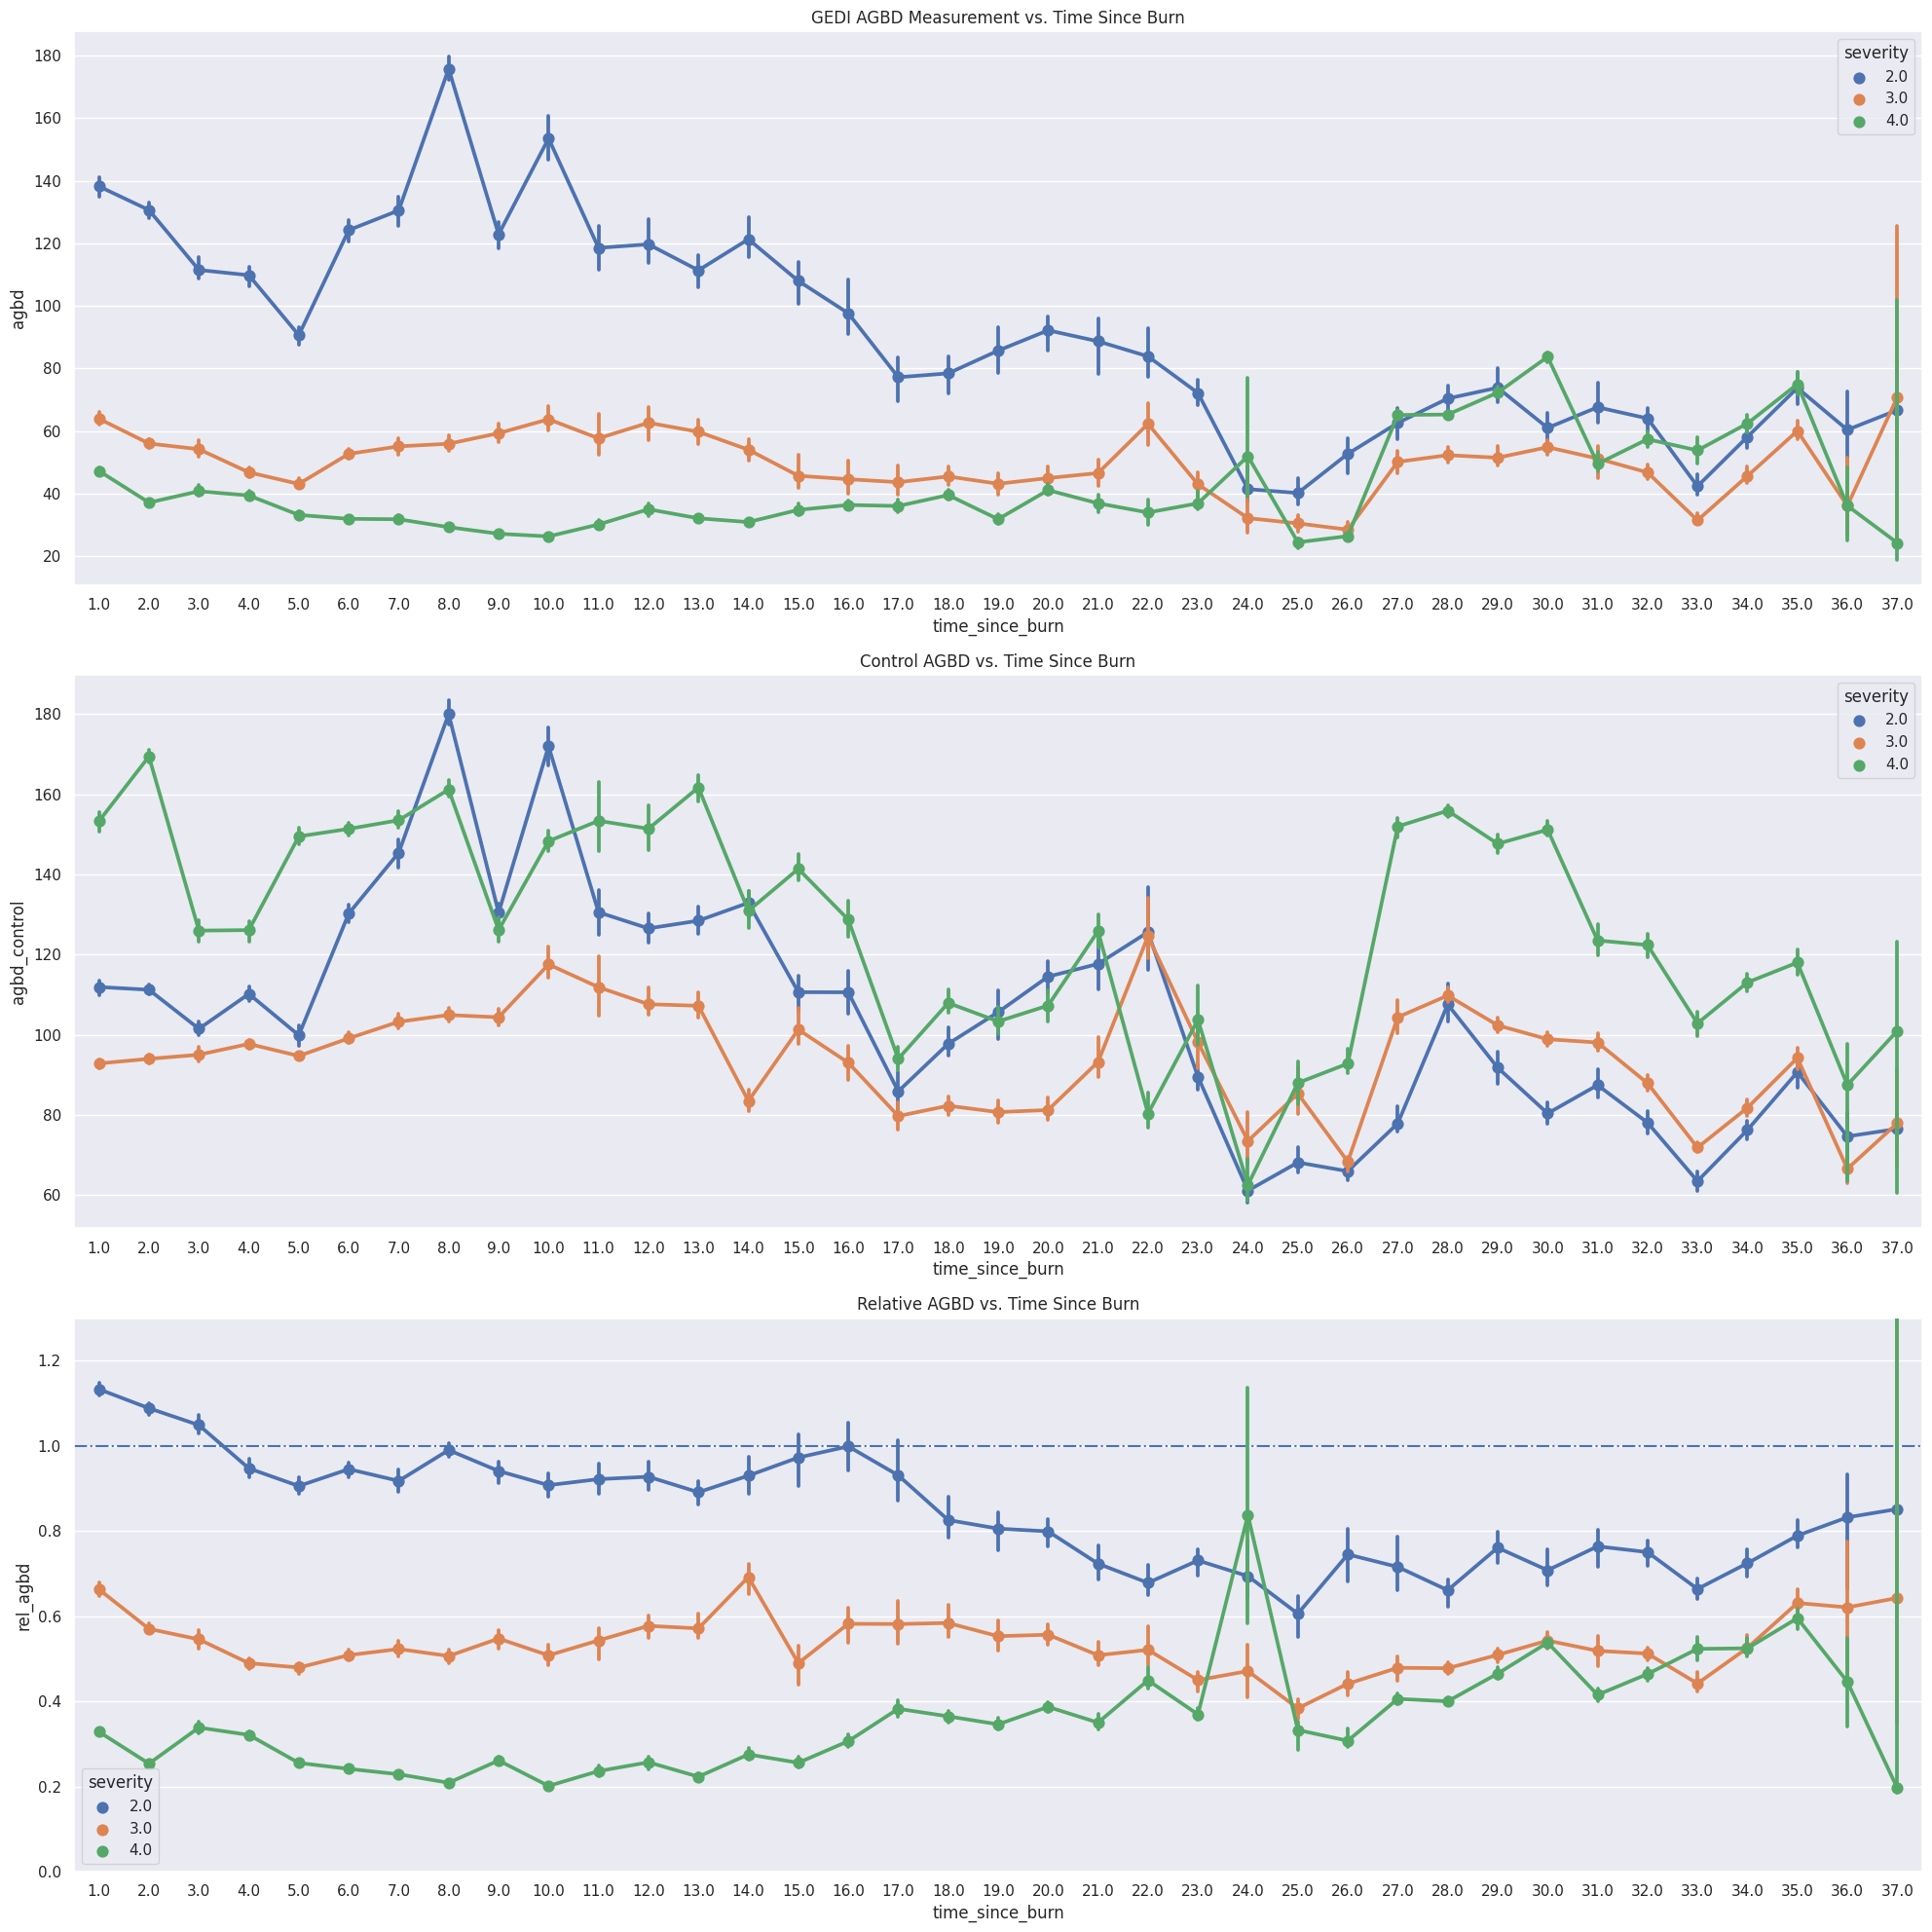

In [21]:
fig, ax = plt.subplots(3, 1, figsize=(20, 20))
sns.pointplot(gedi_recovery_2x2[gedi_recovery_2x2.pft_class==1], x='time_since_burn', y='agbd', hue='severity', estimator='median', ax=ax[0])
sns.pointplot(gedi_recovery_2x2[gedi_recovery_2x2.pft_class==1], x='time_since_burn', y='agbd_control', hue='severity', estimator='median', ax=ax[1])
sns.pointplot(gedi_recovery_2x2[gedi_recovery_2x2.pft_class==1], x='time_since_burn', y='rel_agbd', hue='severity', estimator='median', ax=ax[2])
ax[2].axhline(y=1, linestyle="-.")

ax[0].set_title("GEDI AGBD Measurement vs. Time Since Burn")
ax[1].set_title("Control AGBD vs. Time Since Burn")
ax[2].set_title("Relative AGBD vs. Time Since Burn")

ax[2].set_ylim((0, 1.3))
fig.tight_layout()